### Cleaning and exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ramen = pd.read_csv('ramen-ratings.csv')
ramen.head()

Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [3]:
ramen.shape

(2580, 7)

In [4]:
ramen.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [5]:
# Top Ten values are formatted as a combined string of year and the ranking so we have to split the string and create
# new columns and drop the old column
new_rank = ramen["Top Ten"].str.split(" ",n = 1, expand = True)
ramen["Year_rank"] = new_rank[0].fillna(0)
ramen["Top10"] = new_rank[1].fillna(0)
ramen.drop(columns = "Top Ten", inplace = True)

In [100]:
#Check the 2NaNs in Style and fill them with "Pack" after looking them up
ramen[pd.isnull(ramen["Style"])]
ramen["Style"].fillna("Pack", inplace = True)

In [8]:
#renaming Review #
ramen = ramen.rename(columns = {'Review #': 'Review_no'})

In [9]:
#drop the rows that were "Unrated"
ramen = ramen.drop(ramen[ramen.Stars == 'Unrated'].index)

In [10]:
rank = []
for i in ramen['Top10']:
    if i != 0:
        i = i.replace("#","")
    rank.append(int(i))
ramen['Rank'] = rank

In [11]:
ramen = ramen.drop(columns = ['Top10'])
ramen.head()

Review_no           Brand  \
0       2580       New Touch   
1       2579        Just Way   
2       2578          Nissin   
3       2577         Wei Lih   
4       2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Year_rank  Rank  
0         0     0  
1         0     0  
2         0     0  
3         0     0  
4         0     0

In [12]:
#Check types
ramen = ramen.astype({"Stars":"float"})
ramen.dtypes

Review_no      int64
Brand         object
Variety       object
Style         object
Country       object
Stars        float64
Year_rank     object
Rank           int64
dtype: object

In [102]:
#Number of reviews and average rating by ramen style. Pack is the most popular and seem to have great rating.
ramen.groupby('Style').agg({'Review_no':'count','Stars':'mean'}).sort_values(by = "Review_no")

Review_no     Stars
Style                     
Bar            1  5.000000
Can            1  3.500000
Box            6  4.291667
Tray         108  3.545139
Cup          450  3.498500
Bowl         481  3.670686
Pack        1530  3.700033

In [13]:
# 10 Countries that have the most reviews
review_vol = ramen.groupby(ramen['Country']).agg({'Review_no':'count'}).sort_values('Review_no',ascending = False)
review_vol[:10]

Review_no
Country               
Japan              352
USA                323
South Korea        307
Taiwan             224
Thailand           191
China              169
Malaysia           155
Hong Kong          137
Indonesia          126
Singapore          109

[Text(0, 0, 'Japan'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Malaysia'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Indonesia'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Nepal'),
 Text(0, 0, 'Myanmar'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Pakistan'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Holland'),
 Text(0, 0, 'Fiji'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Dubai'),
 Text(0, 0, 'Sarawak'),
 Text(0, 0, 'Estonia'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'United States')]

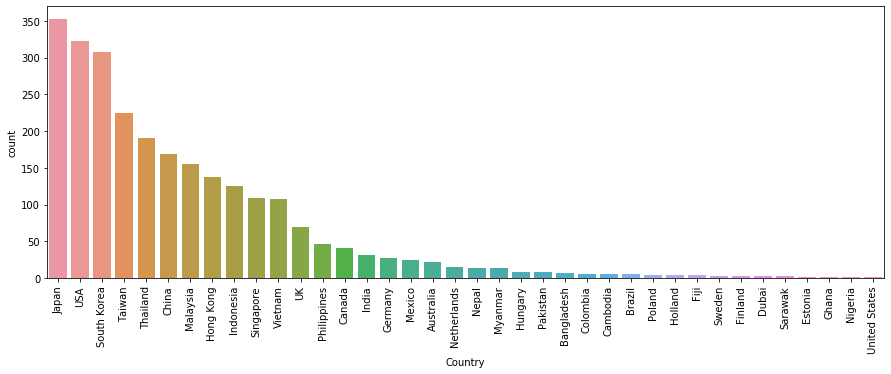

In [14]:
#Plot with seaborn
plt.figure(figsize=(15,5))
chart = sns.countplot(
    data = review_vol,
    x = ramen["Country"],
    order = ramen['Country'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

### Analyzing the labels of different ramen that received 5.0 stars
- Using Natural Language Processing tools to clean, tokenize, lemmatize and vectorize the text in ramen labels
- Visualization by word clouds

In [15]:
five_star = ramen[ramen["Stars"] == 5].sort_values("Country", ascending = True)
five_star

Review_no            Brand  \
512        2068            Maggi   
540        2040           Nissin   
721        1859             Mama   
849        1731             Mama   
1031       1549  Sapporo Ichiban   
...         ...              ...   
45         2535           Nissin   
756        1824         Nongshim   
716        1864           Nissin   
448        2132         Maruchan   
226        2354            Vifon   

                                                Variety Style    Country  \
512   Fusian Special Edition Ow... Ow... Spicy Cow M...  Pack  Australia   
540              Cup Noodles Sabor Franhp Com Requeijao   Cup     Brazil   
721         Instant Noodles chicken Green Curry Flavour  Pack   Cambodia   
849       Instant Noodles Creamy Shrimp Tom Yum Flavour  Pack   Cambodia   
1031          Chow Mein Japanese Style Noodles Yakisoba  Pack     Canada   
...                                                 ...   ...        ...   
45    Cup Noodles Very Veggie Chicken Flavor Ramen N...   Cup        USA   
756                             Soon Veggie Noodle Soup   Cup        USA   
716        Raoh Ramen Noodle Soup Umami Tonkotsu Flavor  Pack        USA   
448   Instant Lunch Chipotle Chicken Flavor Ramen No...   Cup        USA   
226   Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...  Bowl    Vietnam   

      Stars Year_rank  Rank  
512     5.0         0     0  
540     5.0         0     0  
721     5.0         0     0  
849     5.0         0     0  
1031    5.0         0     0  
...     ...       ...   ...  
45      5.0         0     0  
756     5.0         0     0  
716     5.0         0     0  
448     5.0         0     0  
226     5.0         0     0  

[386 rows x 8 columns]

In [17]:
#Combine list of text into 1 big large string
def combine_txt(list_of_txt):
    combined_txt = ' '.join(list_of_txt)
    return combined_txt

In [18]:
df = five_star.groupby("Country").agg(name = ("Variety", lambda x: combine_txt(x)))
df.head()

name
Country                                                     
Australia  Fusian Special Edition Ow... Ow... Spicy Cow M...
Brazil                Cup Noodles Sabor Franhp Com Requeijao
Cambodia   Instant Noodles chicken Green Curry Flavour In...
Canada     Chow Mein Japanese Style Noodles Yakisoba Cuis...
China      Emporer Instant Noodles Spicy Chicken Spicy Ki...

In [19]:
import re
import string

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /Users/jo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#remove puntuation, numbers, tokenize, lemmatize and apply lowercase
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.sub('\w*\d\w*', '', text)
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens]
    text = " ".join([line for line in text])
    return text
round1 = lambda x: clean_text(x)

In [27]:
df_clean = pd.DataFrame(df.name.apply(round1))
df_clean['country'] = df_clean.index
df_clean = df_clean[["country","name"]]
#Calculating the length of the labels to determine whi
df_clean['length'] = [len(i) for i in df_clean.name]
df_clean.sort_values('length', ascending = False)

country                                               name  \
Country                                                                       
Malaysia        Malaysia  penang red tom yum goong noodle taste of malay...   
Taiwan            Taiwan  xo sauce noodle rice noodle shallot with brais...   
Japan              Japan  cup noodle singapore laksa cup noodle milk chi...   
Singapore      Singapore  extra spicy curry instant noodle sens laksa in...   
South Korea  South Korea  maesaengyitangmyun baked noodle jin jjambbong ...   
Hong Kong      Hong Kong  demae ramen spicy seafood flavour instant nood...   
USA                  USA  yokohama tonkotsu shoyu cup noodle very veggie...   
Thailand        Thailand  shrimp creamy tom yum mi goreng creamy tom yum...   
Indonesia      Indonesia  mi goreng ala jawa dengan sambal cabe asli ins...   
China              China  emporer instant noodle spicy chicken spicy kin...   
Myanmar          Myanmar  seafood tom yum sichek flavour instant noodle ...   
UK                    UK  instant noodle taste sensation creamy shrimp t...   
Cambodia        Cambodia  instant noodle chicken green curry flavour ins...   
Canada            Canada  chow mein japanese style noodle yakisoba cuisi...   
India              India  atta noodle jhatpat banao befikr khao minute n...   
Vietnam          Vietnam  viet cuisine bun rieu cua sour crab soup insta...   
Philippines  Philippines  pancit canton sweet spicy pancit canton toyo m...   
Australia      Australia   fusian special edition ow ow spicy cow mi goreng   
Mexico            Mexico        cup noodle gourmet sabor a caldo de camaron   
Brazil            Brazil              cup noodle sabor franhp com requeijao   
Nepal              Nepal                preeti instant noodle veg soup base   
Sarawak          Sarawak                      instant kampua dark soy sauce   
Germany          Germany                              soba yakitori chicken   

             length  
Country              
Malaysia       2024  
Taiwan         1790  
Japan          1740  
Singapore      1294  
South Korea    1114  
Hong Kong       995  
USA             962  
Thailand        767  
Indonesia       653  
China           391  
Myanmar         147  
UK              133  
Cambodia         87  
Canada           75  
India            64  
Vietnam          64  
Philippines      50  
Australia        48  
Mexico           43  
Brazil           37  
Nepal            35  
Sarawak          29  
Germany          21

In [58]:
#select the ones that have more ramen labels than others based on the total length of the labels >50 words
df_selected = df_clean[df_clean["length"] >50].sort_values("length", ascending = False)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
#Produce document term matrix that includes bigrams
cv = CountVectorizer(ngram_range = (1,2))
df_cv = cv.fit_transform(df_selected['name'])
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_selected.index
df_dtm

adventure  adventure chicken  aka  aka tonkotsu  ala  ala jawa  \
Country                                                                       
Malaysia             0                  0    0             0    0         0   
Taiwan               0                  0    0             0    0         0   
Japan                0                  0    0             0    0         0   
Singapore            0                  0    0             0    0         0   
South Korea          0                  0    0             0    0         0   
Hong Kong            0                  0    1             1    0         0   
USA                  0                  0    0             0    0         0   
Thailand             0                  0    0             0    0         0   
Indonesia            0                  0    0             0    1         1   
China                0                  0    0             0    0         0   
Myanmar              0                  0    0             0    0         0   
UK                   0                  0    0             0    0         0   
Cambodia             0                  0    0             0    0         0   
Canada               1                  1    0             0    0         0   
India                0                  0    0             0    0         0   
Vietnam              0                  0    0             0    0         0   

             aloe  aloe noodle  aloe thin  aloe vera  ...  yum mi  yum mohfai  \
Country                                               ...                       
Malaysia        0            0          0          0  ...       0           0   
Taiwan          6            3          1          2  ...       0           0   
Japan           0            0          0          0  ...       0           0   
Singapore       0            0          0          0  ...       0           0   
South Korea     0            0          0          0  ...       0           0   
Hong Kong       0            0          0          0  ...       0           0   
USA             0            0          0          0  ...       0           0   
Thailand        0            0          0          0  ...       1           2   
Indonesia       0            0          0          0  ...       0           0   
China           0            0          0          0  ...       0           0   
Myanmar         0            0          0          0  ...       0           0   
UK              0            0          0          0  ...       0           0   
Cambodia        0            0          0          0  ...       0           0   
Canada          0            0          0          0  ...       0           0   
India           0            0          0          0  ...       0           0   
Vietnam         0            0          0          0  ...       0           0   

             yum nonfried  yum noodle  yum shrimp  yum sichek  zha  zha wang  \
Country                                                                        
Malaysia                0           1           0           0    0         0   
Taiwan                  0           0           0           0    0         0   
Japan                   0           0           0           0    0         0   
Singapore               0           0           0           0    0         0   
South Korea             0           0           0           0    1         1   
Hong Kong               0           0           0           0    0         0   
USA                     0           0           0           0    0         0   
Thailand                1           0           1           0    0         0   
Indonesia               0           0           0           0    0         0   
China                   0           0           0           0    0         0   
Myanmar                 0           0           0           1    0         0   
UK                      0           0           0           0    0         0   
Cambodia   

In [61]:
desc = df_dtm.transpose()
desc

Country            Malaysia  Taiwan  Japan  Singapore  South Korea  Hong Kong  \
adventure                 0       0      0          0            0          0   
adventure chicken         0       0      0          0            0          0   
aka                       0       0      0          0            0          1   
aka tonkotsu              0       0      0          0            0          1   
ala                       0       0      0          0            0          0   
...                     ...     ...    ...        ...          ...        ...   
yum sichek                0       0      0          0            0          0   
zha                       0       0      0          0            1          0   
zha wang                  0       0      0          0            1          0   
zhou                      0       1      0          0            0          0   
zhou meat                 0       1      0          0            0          0   

Country            USA  Thailand  Indonesia  China  Myanmar  UK  Cambodia  \
adventure            0         0          0      0        0   0         0   
adventure chicken    0         0          0      0        0   0         0   
aka                  0         0          0      0        0   0         0   
aka tonkotsu         0         0          0      0        0   0         0   
ala                  0         0          1      0        0   0         0   
...                ...       ...        ...    ...      ...  ..       ...   
yum sichek           0         0          0      0        1   0         0   
zha                  0         0          0      0        0   0         0   
zha wang             0         0          0      0        0   0         0   
zhou                 0         0          0      0        0   0         0   
zhou meat            0         0          0      0        0   0         0   

Country            Canada  India  Vietnam  
adventure               1      0        0  
adventure chicken       1      0        0  
aka                     0      0        0  
aka tonkotsu            0      0        0  
ala                     0      0        0  
...                   ...    ...      ...  
yum sichek              0      0        0  
zha                     0      0        0  
zha wang                0      0        0  
zhou                    0      0        0  
zhou meat               0      0        0  

[1652 rows x 16 columns]

In [62]:
#Store top 20 common words in a dictionary where countries are keys and lists of words are values
top_dict = {}
for c in desc.columns:
    top = desc[c].sort_values(ascending = False).head(20)
    top_dict[c] = list(zip(top.index,top.values))
top_dict

{'Malaysia': [('penang', 34),
  ('noodle', 28),
  ('curry', 25),
  ('taste', 15),
  ('white', 15),
  ('penang white', 14),
  ('white curry', 14),
  ('malaysia', 11),
  ('malaysia penang', 10),
  ('curry noodle', 9),
  ('tom', 8),
  ('yum', 7),
  ('red', 7),
  ('instant noodle', 7),
  ('tom yum', 7),
  ('penang red', 7),
  ('instant', 7),
  ('vermicelli', 6),
  ('hokkien', 6),
  ('soup', 6)],
 'Taiwan': [('noodle', 41),
  ('sauce', 20),
  ('with', 18),
  ('flavor', 16),
  ('noodle with', 12),
  ('oil', 9),
  ('sesame', 6),
  ('aloe', 6),
  ('instant', 6),
  ('spicy', 6),
  ('sichuan', 5),
  ('rice', 5),
  ('onion', 5),
  ('feast', 4),
  ('instant noodle', 4),
  ('flavor instant', 4),
  ('han feast', 4),
  ('han', 4),
  ('curry', 4),
  ('pork', 4)],
 'Japan': [('ramen', 21),
  ('noodle', 16),
  ('cup', 12),
  ('yakisoba', 12),
  ('cup noodle', 11),
  ('flavor', 8),
  ('raoh', 8),
  ('udon', 7),
  ('chikin', 7),
  ('tonkotsu', 6),
  ('ramen cup', 6),
  ('chikin ramen', 6),
  ('miso', 5),


In [63]:
#Print top common words in ramen labels by country
for category, top_words in top_dict.items():
    print(category)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

Malaysia
penang, noodle, curry, taste, white, penang white, white curry, malaysia, malaysia penang, curry noodle, tom, yum, red, instant noodle, tom yum
---
Taiwan
noodle, sauce, with, flavor, noodle with, oil, sesame, aloe, instant, spicy, sichuan, rice, onion, feast, instant noodle
---
Japan
ramen, noodle, cup, yakisoba, cup noodle, flavor, raoh, udon, chikin, tonkotsu, ramen cup, chikin ramen, miso, sauce, shoyu
---
Singapore
noodle, instant, flavour, soup, singapore, spicy, mian, la, la mian, laksa, flavor, instant noodle, curry, creamy, mee
---
South Korea
noodle, ramyun, ramen, rice, seafood, spicy, jinjja, topokki, jjampong, flavor, jjamppong, cheese, bowl, soup, crab
---
Hong Kong
noodle, flavour, instant, instant noodle, flavour instant, demae, ramen, demae ramen, tonkotsu, seafood, seafood flavour, nupasta, tonkotsu flavour, spicy, soup
---
USA
ramen, noodle, flavor, soup, noodle soup, tonkotsu, ramen noodle, flavor ramen, chicken, veggie, spicy, chicken flavor, noodle very, 

In [64]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# the top 20 words for each category
words = []
for category in desc.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)
        
words

['penang',
 'noodle',
 'curry',
 'taste',
 'white',
 'penang white',
 'white curry',
 'malaysia',
 'malaysia penang',
 'curry noodle',
 'tom',
 'yum',
 'red',
 'instant noodle',
 'tom yum',
 'penang red',
 'instant',
 'vermicelli',
 'hokkien',
 'soup',
 'noodle',
 'sauce',
 'with',
 'flavor',
 'noodle with',
 'oil',
 'sesame',
 'aloe',
 'instant',
 'spicy',
 'sichuan',
 'rice',
 'onion',
 'feast',
 'instant noodle',
 'flavor instant',
 'han feast',
 'han',
 'curry',
 'pork',
 'ramen',
 'noodle',
 'cup',
 'yakisoba',
 'cup noodle',
 'flavor',
 'raoh',
 'udon',
 'chikin',
 'tonkotsu',
 'ramen cup',
 'chikin ramen',
 'miso',
 'sauce',
 'shoyu',
 'men',
 'curry',
 'shio',
 'hakata',
 'tonkotsu ramen',
 'noodle',
 'instant',
 'flavour',
 'soup',
 'singapore',
 'spicy',
 'mian',
 'la',
 'la mian',
 'laksa',
 'flavor',
 'instant noodle',
 'curry',
 'creamy',
 'mee',
 'with',
 'crab',
 'creamy soup',
 'crushed',
 'crushed noodle',
 'noodle',
 'ramyun',
 'ramen',
 'rice',
 'seafood',
 'spicy',


In [65]:
Counter(words).most_common() 

[('noodle', 15),
 ('instant', 10),
 ('instant noodle', 8),
 ('soup', 7),
 ('spicy', 7),
 ('flavor', 6),
 ('curry', 5),
 ('cup', 5),
 ('flavour', 5),
 ('chicken', 5),
 ('tom', 4),
 ('yum', 4),
 ('tom yum', 4),
 ('rice', 4),
 ('ramen', 4),
 ('cup noodle', 4),
 ('creamy', 4),
 ('shrimp', 4),
 ('vermicelli', 3),
 ('sauce', 3),
 ('with', 3),
 ('tonkotsu', 3),
 ('crab', 3),
 ('flavour instant', 3),
 ('beef', 3),
 ('instant rice', 3),
 ('taste', 2),
 ('pork', 2),
 ('yakisoba', 2),
 ('miso', 2),
 ('shoyu', 2),
 ('seafood', 2),
 ('king', 2),
 ('creamy tom', 2),
 ('jumbo', 2),
 ('yum flavour', 2),
 ('shrimp tom', 2),
 ('cuisine', 2),
 ('penang', 1),
 ('white', 1),
 ('penang white', 1),
 ('white curry', 1),
 ('malaysia', 1),
 ('malaysia penang', 1),
 ('curry noodle', 1),
 ('red', 1),
 ('penang red', 1),
 ('hokkien', 1),
 ('noodle with', 1),
 ('oil', 1),
 ('sesame', 1),
 ('aloe', 1),
 ('sichuan', 1),
 ('onion', 1),
 ('feast', 1),
 ('flavor instant', 1),
 ('han feast', 1),
 ('han', 1),
 ('raoh', 1)

In [84]:
#Add more stop words that are very common words and appear more than 5 times
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words.extend(['ramen','cup','flavour','taste'])
add_stop_words.extend(list(df_selected.index))
add_stop_words = [word.lower() for word in add_stop_words]
add_stop_words

['noodle',
 'instant',
 'instant noodle',
 'soup',
 'spicy',
 'flavor',
 'ramen',
 'cup',
 'flavour',
 'taste',
 'malaysia',
 'taiwan',
 'japan',
 'singapore',
 'south korea',
 'hong kong',
 'usa',
 'thailand',
 'indonesia',
 'china',
 'myanmar',
 'uk',
 'cambodia',
 'canada',
 'india',
 'vietnam']

In [85]:
from sklearn.feature_extraction import text 

In [86]:
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix without the updated stop words
cv1 = CountVectorizer(stop_words=stop_words)
df_cv1 = cv1.fit_transform(df_selected.name)
df_stop = pd.DataFrame(df_cv1.toarray(), columns=cv1.get_feature_names())
df_stop.index = df_selected.index
df_stop

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['hong', 'kong', 'korea', 'south'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


adventure  aka  ala  aloe  angry  arrabiata  artificial  \
Country                                                                
Malaysia             0    0    0     0      0          0           0   
Taiwan               0    0    0     6      0          0           0   
Japan                0    0    0     0      0          0           1   
Singapore            0    0    0     0      1          0           0   
South Korea          0    0    0     0      0          0           0   
Hong Kong            0    1    0     0      0          0           1   
USA                  0    0    0     0      0          1           0   
Thailand             0    0    0     0      0          0           0   
Indonesia            0    0    1     0      0          0           0   
China                0    0    0     0      0          0           0   
Myanmar              0    0    0     0      0          0           0   
UK                   0    0    0     0      0          0           0   
Cambodia             0    0    0     0      0          0           0   
Canada               1    0    0     0      0          0           0   
India                0    0    0     0      0          0           0   
Vietnam              0    0    0     0      0          0           0   

             artificially  asam  asia  ...  yakibuta  yakisoba  yam  yentafo  \
Country                                ...                                     
Malaysia                0     2     0  ...         0         0    1        0   
Taiwan                  0     0     0  ...         0         0    0        0   
Japan                   0     0     0  ...         1        12    0        0   
Singapore               0     0     0  ...         0         0    2        0   
South Korea             0     0     0  ...         0         0    0        0   
Hong Kong               0     0     0  ...         0         0    0        0   
USA                     1     0     1  ...         0         0    0        0   
Thailand                0     0     0  ...         0         0    1        3   
Indonesia               0     0     0  ...         0         0    0        0   
China                   0     0     0  ...         0         0    0        0   
Myanmar                 0     0     0  ...         0         0    0        0   
UK                      0     0     0  ...         0         0    0        0   
Cambodia                0     0     0  ...         0         0    0        0   
Canada                  0     0     0  ...         0         1    0        0   
India                   0     0     0  ...         0         0    0        0   
Vietnam                 0     0     0  ...         0         0    0        0   

             yokohama  yomise  yukino  yum  zha  zhou  
Country                                                
Malaysia            0       0       0    7    0     0  
Taiwan              0       0       0    0    0     1  
Japan               0       1       1    1    0     0  
Singapore           0       0       0    0    0     0  
South Korea         0       0       0    0    1     0  
Hong Kong           0       0       0    0    0     0  
USA                 1       0       0    0    0     0  
Thailand            0       0       0    9    0     0  
Indonesia           0       0       0    0    0     0  
China               0       0       0    0    0     0  
Myanmar             0       0       0    2    0     0  
UK                  0       0       0    1    0     0  
Cambodia            0       0       0    1    0     0  
Canada              0       0       0    0    0     0  
India               0       0       0    0    0     0  
Vietnam             0       0       0    0    0     0  

[16 rows x 436 columns]

In [87]:
from wordcloud import WordCloud

In [88]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

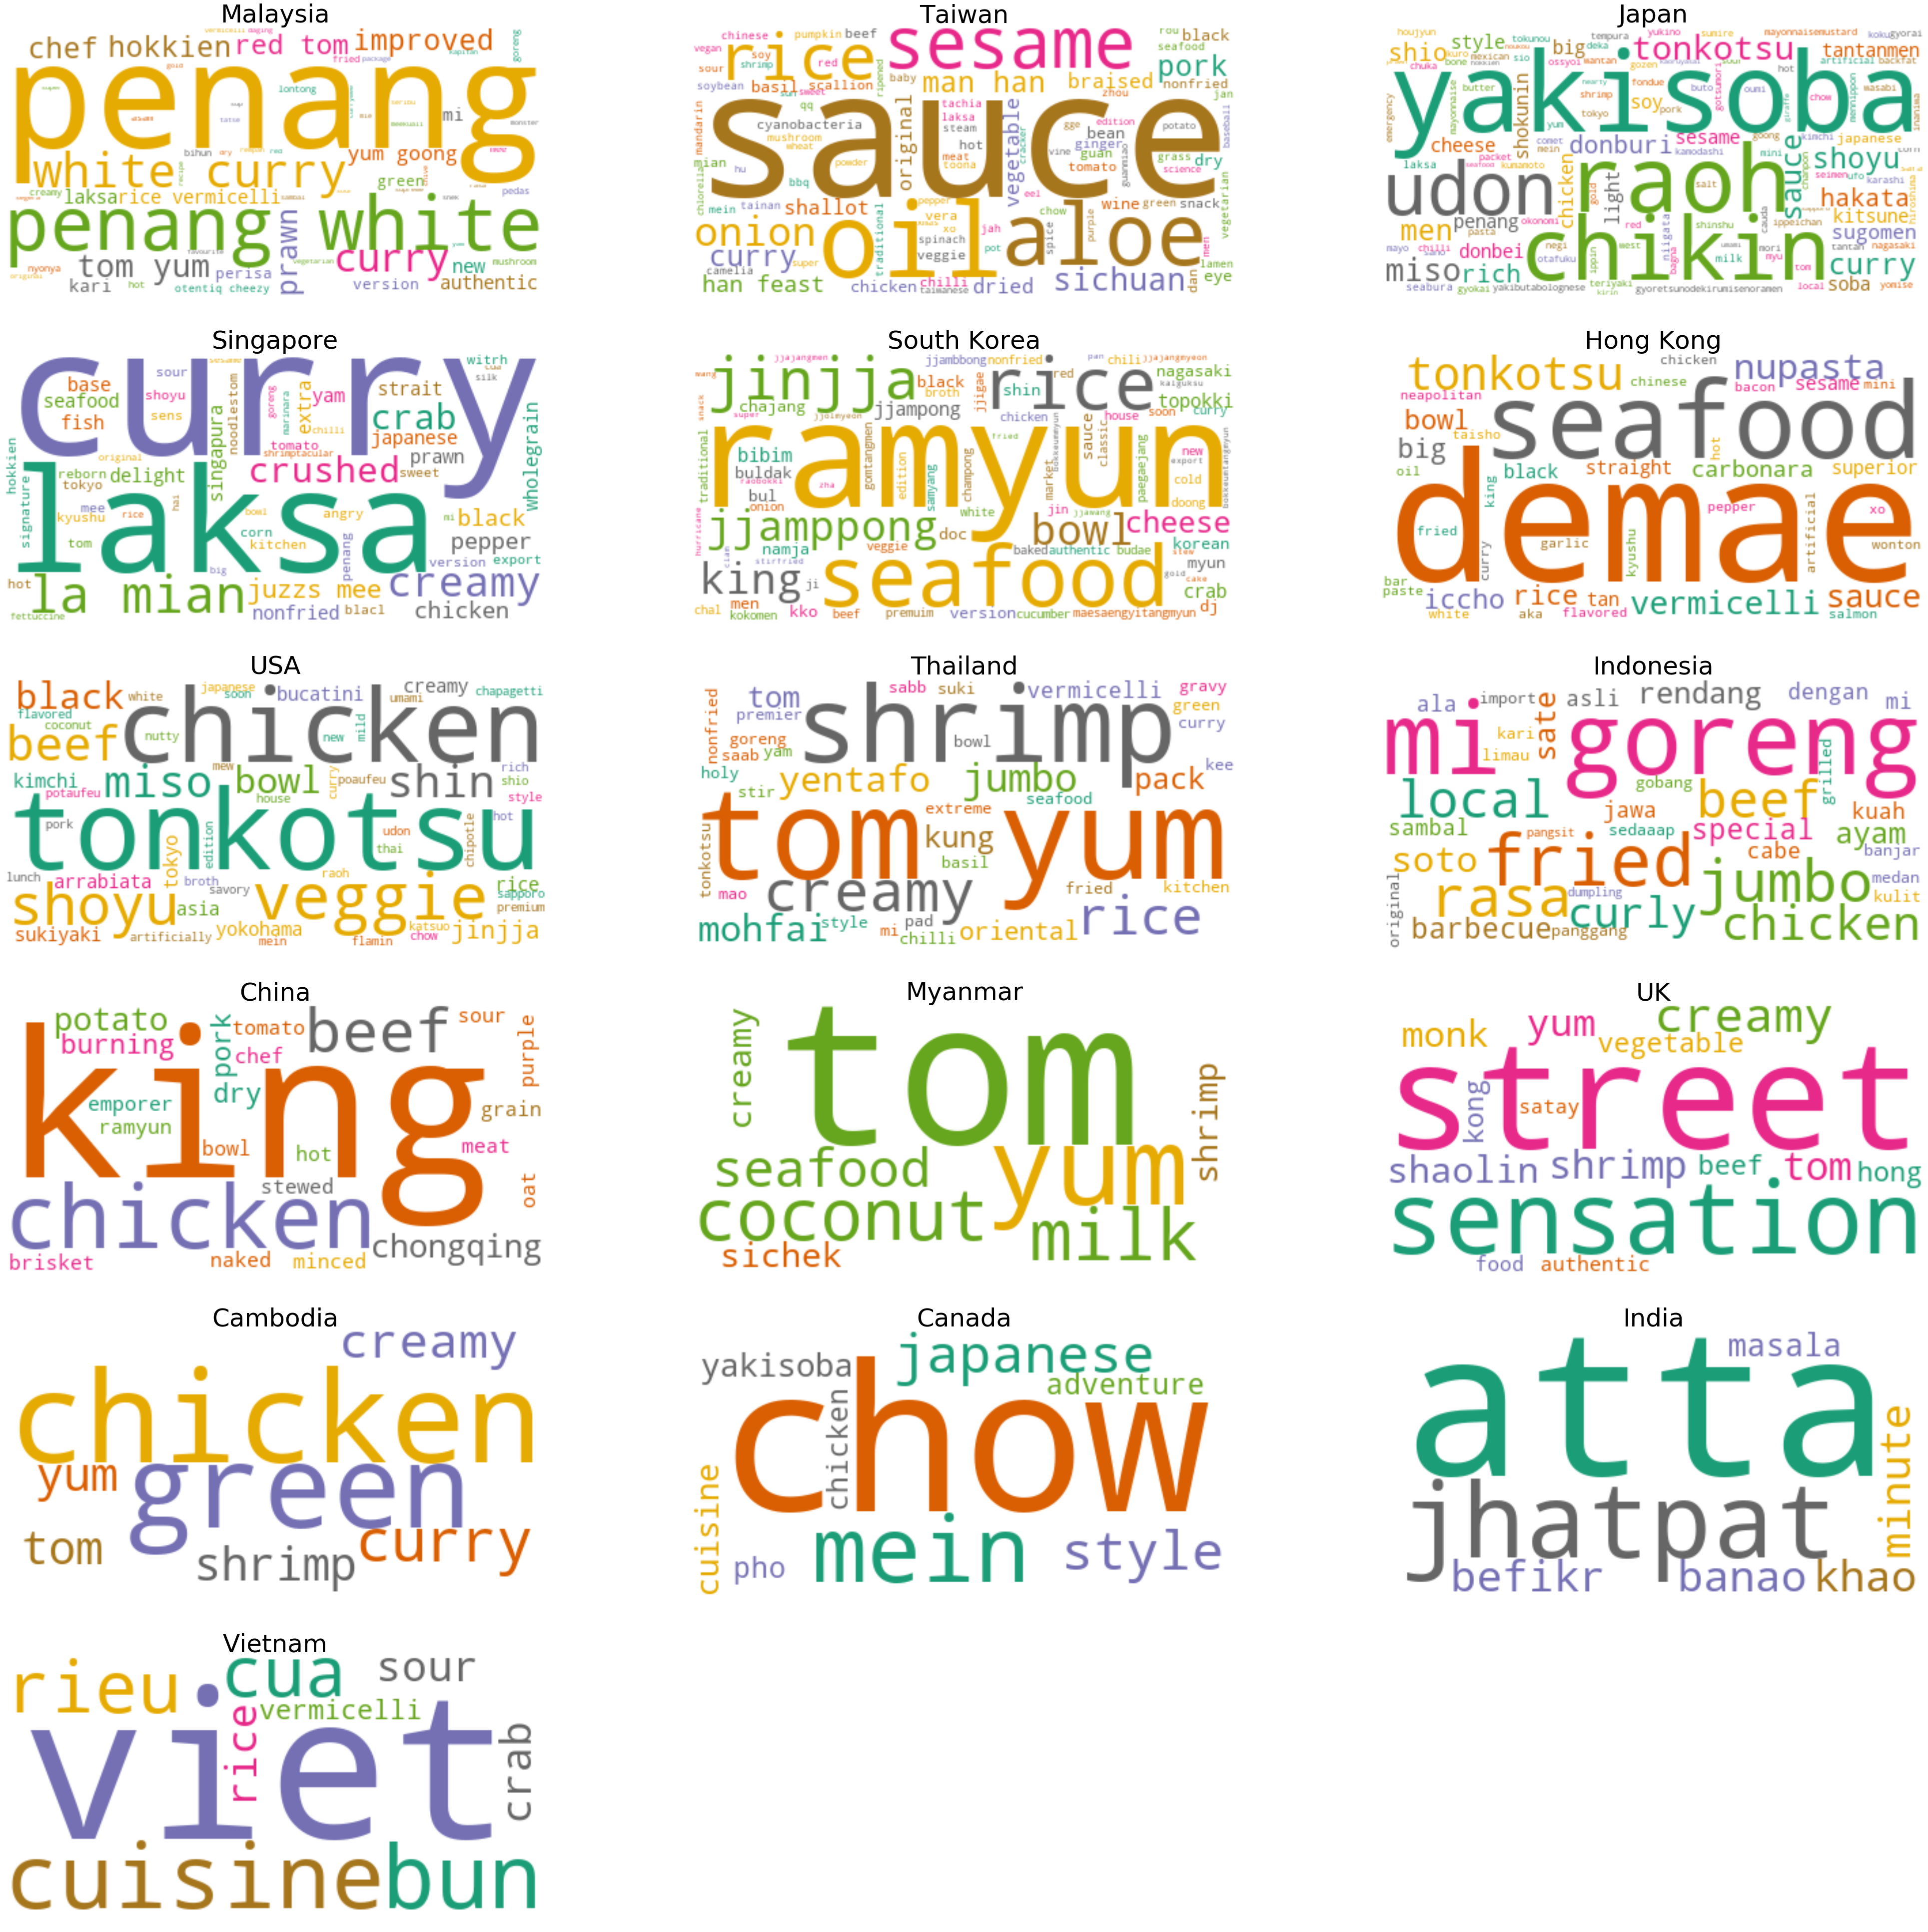

In [91]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [70,70]

names = df_selected.country

# Create subplots for each comedian
for index, category in enumerate(desc.columns):
    wc.generate(df_selected.name[category])
    
    plt.subplot(6,3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(names[index],fontsize = 50)
    
plt.show()

These word clouds help us visualize the main ingredients, the style and cuisine of different 5.0 star ramen labels from different country. The order of these word clouds also reflects the number/quantity of 5.0 star ramen that each country has. 